In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import warnings
#warnings.filterwarnings('ignore')

df = pd.read_csv('heart.csv')


In [2]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [8]:
mean_chol = df[df['Cholesterol'] != 0]['Cholesterol'].mean()       #FIND MEAN

In [9]:
print(mean_chol)

244.6353887399464


In [10]:
df['Cholesterol'] = df['Cholesterol'].replace(0, mean_chol)      #REPLACE 0 WITH MEAN

In [11]:
mean_chol = round(mean_chol, 2)                             #ROUNDOFF MEAN VALUE TO 2 

In [12]:
mean_chol

np.float64(244.64)

In [13]:
df['Cholesterol'].value_counts()

Cholesterol
244.635389    172
254.000000     11
220.000000     10
223.000000     10
204.000000      9
             ... 
353.000000      1
278.000000      1
157.000000      1
176.000000      1
131.000000      1
Name: count, Length: 222, dtype: int64

In [14]:
df['Cholesterol'].head(10)

0    289.0
1    180.0
2    283.0
3    214.0
4    195.0
5    339.0
6    237.0
7    208.0
8    207.0
9    284.0
Name: Cholesterol, dtype: float64

In [15]:
mean_resBP = df[df['RestingBP'] != 0]['RestingBP'].mean()        #find mean

In [16]:
mean_resBP

np.float64(132.54089422028352)

In [17]:
mean_resBP = round(mean_chol, 2)                                 #ROUND OFF

In [18]:
mean_resBP

np.float64(244.64)

In [19]:
df['RestingBP'] = df['RestingBP'].replace(0, mean_resBP)        #REPLACE ZERO WITH MEAN VALUES

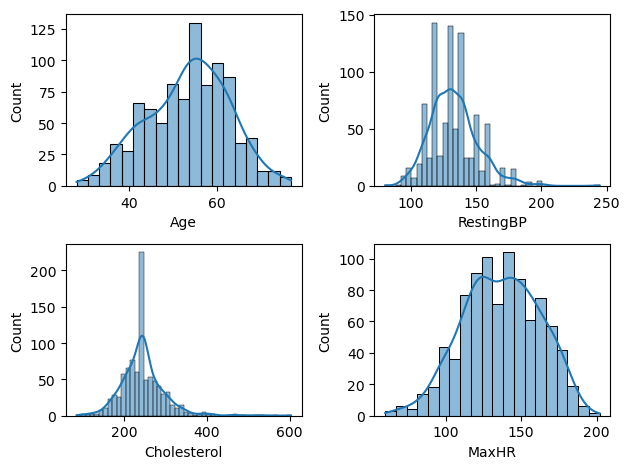

In [20]:

def plotting(var, num):
    plt.subplot(2,2,num)
    sns.histplot(df[var], kde=True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)

plt.tight_layout()

In [21]:
df_encode = pd.get_dummies(df, drop_first=True)
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [22]:
df_encode = df_encode.astype(int)

In [23]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [24]:
df_encode.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [25]:
#for the above code u can go the the myModel_usingHeartData.ipynb file to see in detail

In [26]:
# no we will make the model now

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report

# 🤖 Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [28]:
X = df_encode.drop('HeartDisease', axis=1)
y = df_encode['HeartDisease']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Naive Bayes": GaussianNB()
}

In [31]:
# Train and Evaluate All Models
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': acc, 'F1 Score': f1})

In [32]:
results

[{'Model': 'Logistic Regression',
  'Accuracy': 0.8586956521739131,
  'F1 Score': 0.8737864077669902},
 {'Model': 'Decision Tree',
  'Accuracy': 0.7989130434782609,
  'F1 Score': 0.8159203980099502},
 {'Model': 'K-Nearest Neighbors',
  'Accuracy': 0.8641304347826086,
  'F1 Score': 0.8803827751196173},
 {'Model': 'Support Vector Machine',
  'Accuracy': 0.842391304347826,
  'F1 Score': 0.8625592417061612},
 {'Model': 'Naive Bayes',
  'Accuracy': 0.8478260869565217,
  'F1 Score': 0.8613861386138614}]

In [33]:
results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,F1 Score
0,Logistic Regression,0.858696,0.873786
1,Decision Tree,0.798913,0.815920
2,K-Nearest Neighbors,0.864130,0.880383
3,Support Vector Machine,0.842391,0.862559
4,Naive Bayes,0.847826,0.861386


In [34]:
# from the above dataframe k-Nearest neighbors gives the best accuracy and f1 score 

-----------------Pickling--------------------

After training your model(s), pickling lets you save the trained model to a file so you can reuse it later without retraining.
This is especially useful when you deploy your project 

In [35]:
# Pickling = saving a Python object (like a trained model) into a file using the pickle module.
# Unpickling = loading it back.

In [36]:
import joblib
joblib.dump(models['K-Nearest Neighbors'], 'knn_heart_disease.pkl')   #SAVING THE MODEL
joblib.dump(scaler, 'scaler_heart_disease.pkl')   #SAVING THE SCALER OBJECT
joblib.dump(X.columns.tolist(), 'columns_heart_disease.pkl')  #SAVING THE FEATURE COLUMNS


['columns_heart_disease.pkl']

In [ ]:
#after doing  this we get three pickled files:
#1. knn_heart_disease.pkl  --> contains the trained KNN model
#2. scaler_heart_disease.pkl  --> contains the StandardScaler object
#3. columns_heart_disease.pkl  --> contains the list of feature columns used in

# we will save these files in a folder named 'pickled_model_files'
# these files will be used in the deployment of the model